In [1]:
import csv
import matplotlib.pyplot as plt
import readgadget as rg 
import numpy as np
from scipy.spatial import cKDTree


Returning BULGE Positions
Returning BULGE Mass
Returning BULGE Particle IDs
Returning BULGE Velocities
(125000,) [3.9938847e-10 3.9938847e-10 3.9938847e-10 ... 3.9938847e-10 3.9938847e-10
 3.9938847e-10]


(-40.0, 40.0)

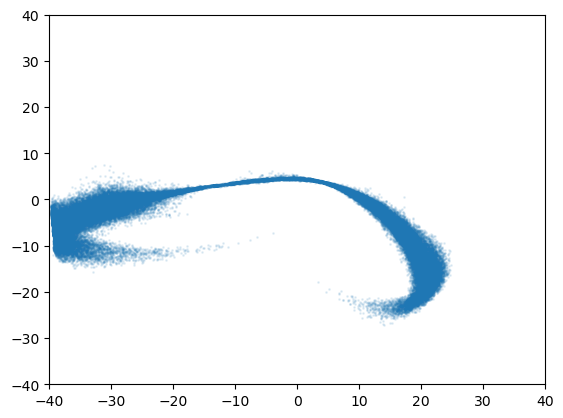

In [3]:
runpath = '/home/guozx/GC/Output/highre_scale_0/'
i = 300 
snapfname = runpath + 'snapshot_' + str(i).zfill(3) 

pbulge = rg.readsnap(snapfname, 'pos', 'bulge')
mbulge = rg.readsnap(snapfname, 'mass', 'bulge')
idbulge = rg.readsnap(snapfname, 'pid', 'bulge')

#phalo = rg.readsnap(snapfname, 'pos', 'dm')
#mhalo = rg.readsnap(snapfname, 'mass', 'dm')
vbulge = rg.readsnap(snapfname, 'vel', 'bulge')
#plt.scatter(phalo[:,0],phalo[:,1],s=1,alpha = 0.1)
plt.scatter(pbulge[:,0],pbulge[:,1],s=1,alpha = 0.1)
print(mbulge.shape,mbulge)
plt.xlim(-40,40)
plt.ylim(-40,40)

[248.8868   61.584   -46.71198]
[-13.219014   3.034565   7.533222]


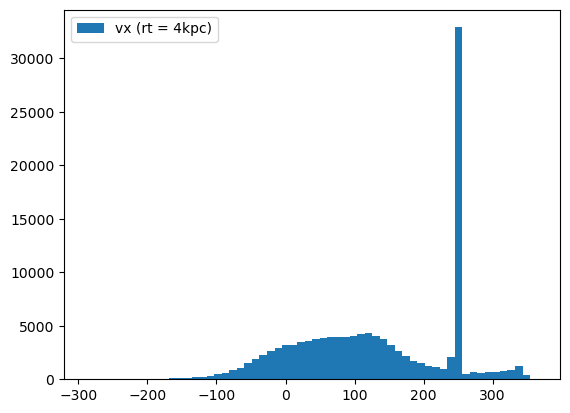

In [4]:

def cent_h(X):


    # 构建 KD 树
    tree = cKDTree(X)  

    # 为每个点查询最近的30个邻居点
    dist, ind = tree.query(X, k=40)  

    # 计算局部密度
    epsilon = 1e-5
    rho = 1 / (dist + epsilon).sum(axis=1)

    # 密度最大值点的索引
    densest_idx = np.argmax(rho)

    return X[densest_idx]
cent = cent_h(pbulge)
#rhalo_cen = (((phalo-cent)**2).sum(-1))**0.5
rbulge_cen = (((pbulge-cent)**2).sum(-1))**0.5
vgal = np.mean(vbulge[rbulge_cen <= 0.3, :], axis=0)
print(vgal)
print(cent)
plt.hist(vbulge[:,0],bins=60,label = 'vx (rt = 4kpc)')

plt.legend()

1.327207813833775e-05


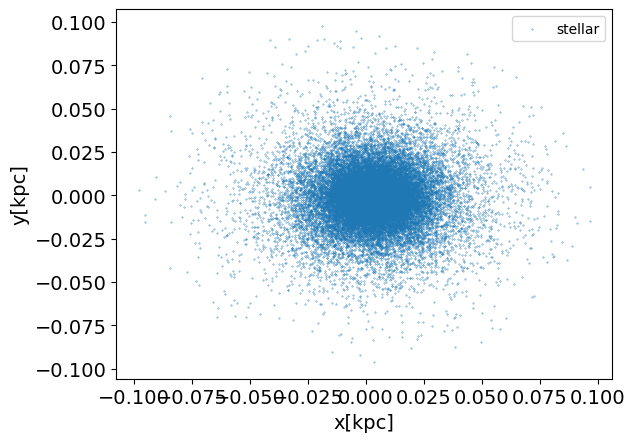

In [5]:
#rhalo_cen = (((phalo-cent)**2).sum(-1))**0.5
rbulge_cen = (((pbulge-cent)**2).sum(-1))**0.5
#bound_halo = phalo[rhalo_cen<1.2] - cent
bound_bulge = pbulge[rbulge_cen<0.1] - cent
#plt.scatter(bound_halo[:,0],bound_halo[:,1],s=0.5,label='dark matter')
plt.scatter(bound_bulge[:,0],bound_bulge[:,1],s=0.08,label='stellar')

plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('x[kpc]',fontsize =14)
plt.ylabel('y[kpc]',fontsize = 14)
#plt.title('angle=$30^\circ$',fontsize=14)
#GC_dmass = mhalo[0]*len(bound_halo)GC_dmass
GC_bulmass = mbulge[0]*len(bound_bulge)

print(GC_bulmass)

In [71]:
n=100
r_bulge = rbulge_cen[rbulge_cen<1]
m_bulge = mbulge[rbulge_cen<1]
#r_halo = rhalo_cen[rhalo_cen<1]
#m_halo = mhalo[rhalo_cen<1]
m_b = np.zeros(n)
m_dm = np.zeros_like(m_b) 
m_total = np.zeros_like(m_b) 

rho_b = np.zeros(n)
rho_dm = np.zeros_like(m_b) 
rho_total = np.zeros_like(m_b) 
r = np.logspace(-3.,1.,n)
for i in range(n):
    m_b[i] = m_bulge[r_bulge<=r[i]].sum()*1e10
    #m_dm[i] = m_halo[r_halo<=r[i]].sum()*1e10
    #m_total[i] = m_b[i] + m_dm[i]
    #print(m_b[i])
for i in range(n):
    if i==0:
        rho_b[i] = m_b[i]*3/4/np.pi/r[i]**3
        #rho_dm[i] = m_dm[i]*3/4/np.pi/r[i]**3
        #rho_total[i] = rho_b[i]+rho_dm[i]
    else:
        rho_b[i]=(m_b[i]-m_b[i-1])*3/4/np.pi/(r[i]**3-r[i-1]**3)
        #rho_dm[i]=(m_dm[i]-m_dm[i-1])*3/4/np.pi/(r[i]**3-r[i-1]**3)
        #rho_total[i] = rho_b[i]+rho_dm[i]


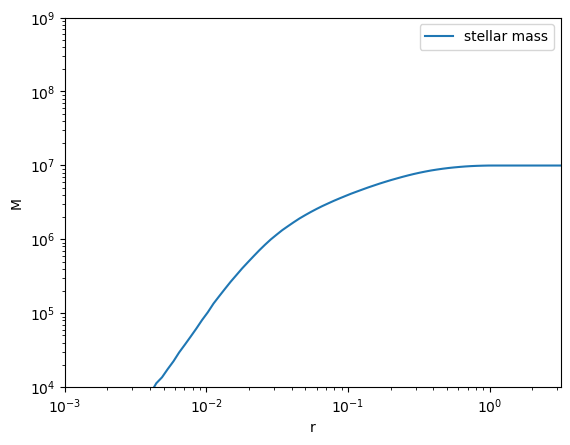

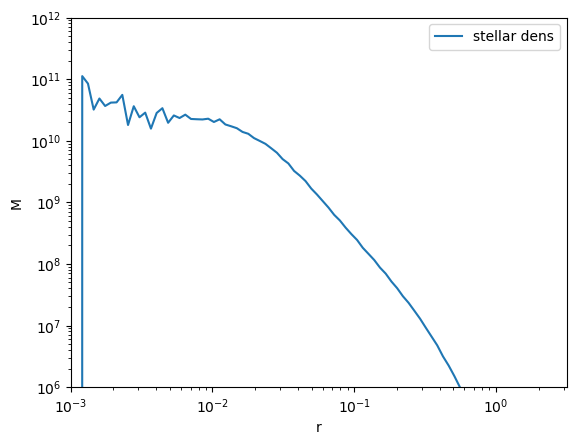

In [72]:
plt.plot(r,m_b,label = 'stellar mass')
#plt.plot(r,m_dm,label = 'dm mass')
#plt.plot(r,m_total,label = 'total mass')
plt.legend()
plt.xlabel("r")
plt.ylabel(r'M')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e4, 1e9)
plt.xlim(10**(-3),10**(0.5))
plt.show()


plt.plot(r,rho_b,label = 'stellar dens')
#plt.plot(r,rho_dm,label = 'dm dens')
#plt.plot(r,rho_total,label = 'total dens')
plt.legend()
plt.xlabel("r")
plt.ylabel(r'M')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e6, 1e12)
plt.xlim(10**(-3),10**(0.5))
plt.show()


In [210]:
agama.setUnits(mass=1, length=1, velocity=1)
model = agama.SelfConsistentModel(rminSph  = 0.01,
            rmaxSph        = 1000.,
            sizeRadialSph  = 50,
            lmaxAngularSph = 4)
para_halo = dict(type='Dehnen', mass=1e7, scaleRadius=1.2, gamma = 1)
para_bulge = dict(type='King', mass=1e7,W0=8,scaleRadius=0.015)
density_halo = agama.Density(**para_halo)
density_bulge = agama.Density(**para_bulge)
print(density_halo.totalMass(),density_bulge.totalMass())
model.components.append(agama.Component(density=density_bulge,       disklike=False))
model.components.append(agama.Component(density=density_halo,    disklike=False))
model.iterate()
df_halo = agama.DistributionFunction(type='QuasiSpherical',density=density_halo,potential=model.potential)
df_bulge = agama.DistributionFunction(type='QuasiSpherical',density=density_bulge,potential=model.potential)

print(df_halo.totalMass(),df_bulge.totalMass())

self_bulge = dict(rminSph        = 0.001,
                rmaxSph        = 40.,
                sizeRadialSph  = 60,
                lmaxAngularSph = 4)
self_halo = dict(rminSph        = 0.001,
                rmaxSph        = 100.,
                sizeRadialSph  = 60,
                lmaxAngularSph = 4) 
model.components[0]=agama.Component(df=df_bulge,disklike=False,**self_bulge)
model.components[1]=agama.Component(df=df_halo,disklike=False,**self_halo)
xyz=np.vstack((r,r*0,r*0)).T
for iteration in range(10):
    model.iterate()
    densBulge= model.components[0].density
    densHalo = model.components[1].density
    print(densBulge.totalMass(),densHalo.totalMass())

10000000.0 9999630.705638556
Updating potential...done
Updating action finder...done
Computing density for component 0...done
Computing density for component 1...done
Updating potential...done
Updating action finder...done
9999408.334221786 9997228.5049123
Computing density for component 0...done
Computing density for component 1...done
Updating potential...done
Updating action finder...done
9996007.245155254 10006077.885480288
Computing density for component 0...done
Computing density for component 1...done
Updating potential...done
Updating action finder...done
9996003.546856053 10006089.992383052
Computing density for component 0...done
Computing density for component 1...done
Updating potential...done
Updating action finder...done
9996003.133679992 10006089.928589735
Computing density for component 0...done
Computing density for component 1...done
Updating potential...done
Updating action finder...done
9995909.25852097 10006089.899283944
Computing density for component 0...done
Com

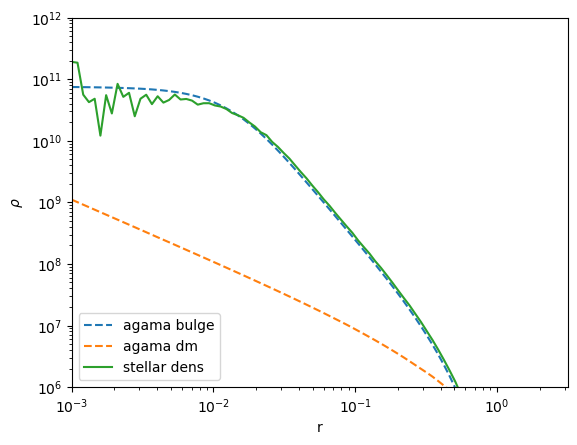

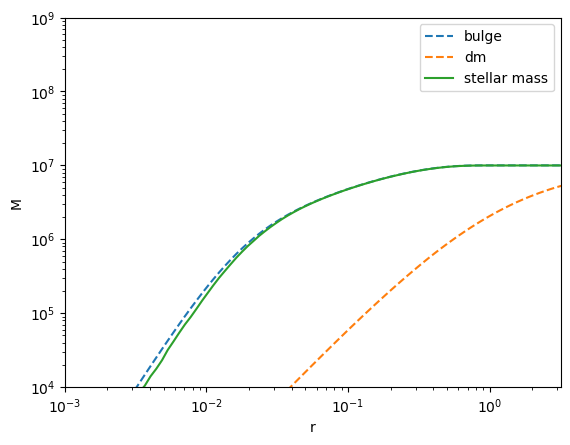

In [211]:
plt.plot(r,densBulge.density(xyz),label='agama bulge',linestyle='dashed')
plt.plot(r,densHalo.density(xyz),label='agama dm',linestyle='dashed')
plt.plot(r,rho_b,label = 'stellar dens')
#plt.plot(r,rho_dm,label = 'dm dens')
#plt.plot(r,rho_total,label = 'total dens')
plt.legend(loc='lower left')
plt.xlabel("r")
plt.ylabel(r'$\rho$')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e6, 1e12)
plt.xlim(10**(-3),10**(0.5))
plt.show()


plt.plot(r,densBulge.enclosedMass(r),label='bulge',linestyle='dashed')
plt.plot(r,densHalo.enclosedMass(r),label='dm',linestyle='dashed')
plt.plot(r,m_b,label = 'stellar mass')
#plt.plot(r,m_dm,label = 'dm mass')
#plt.plot(r,m_total,label = 'total mass')
plt.legend()
plt.xlabel("r")
plt.ylabel(r'M')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e4, 1e9)
plt.xlim(10**(-3),10**(0.5))
plt.show()


In [175]:
r=np.logspace(-4.,1.,10)
print(np.log10(r))

[-4.         -3.44444444 -2.88888889 -2.33333333 -1.77777778 -1.22222222
 -0.66666667 -0.11111111  0.44444444  1.        ]


Returning BULGE Positions
Returning BULGE Mass
Returning DM    Positions
Returning DM    Mass
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning DM    Positions
Returning DM    Mass
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning DM    Positions
Returning DM    Mass
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning DM    Positions
Returning DM    Mass
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning DM    Positions
Returning DM    Mass
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning DM    Positions
Returning DM    Mass
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning DM    Positions
Returning DM    Mass
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning DM    Positions
Returning DM    Mass
Returning BULGE Velocities
Returning BULGE Positions
Return

Returning BULGE Positions
Returning BULGE Mass
Returning DM    Positions
Returning DM    Mass
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning DM    Positions
Returning DM    Mass
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning DM    Positions
Returning DM    Mass
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning DM    Positions
Returning DM    Mass
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning DM    Positions
Returning DM    Mass
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning DM    Positions
Returning DM    Mass
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning DM    Positions
Returning DM    Mass
Returning BULGE Velocities
Returning BULGE Positions
Returning BULGE Mass
Returning DM    Positions
Returning DM    Mass
Returning BULGE Velocities
Returning BULGE Positions
Return

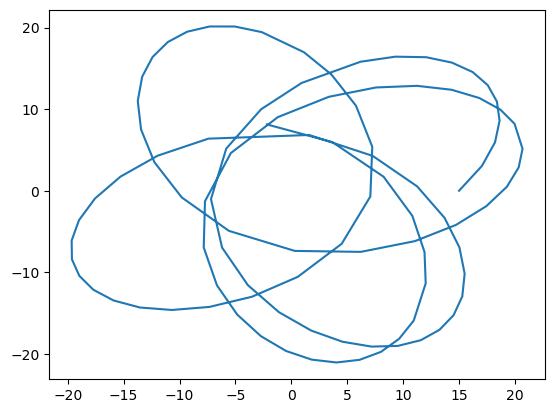

In [11]:
n = 100  # 你可以根据需要更改 n 的值
pos = []
for j in range(0,100):
    snapfname = runpath + 'snapshot_' + str(j).zfill(3) 
    pbulge = rg.readsnap(snapfname, 'pos', 'bulge')
    mbulge = rg.readsnap(snapfname, 'mass', 'bulge')
    phalo = rg.readsnap(snapfname, 'pos', 'dm')
    mhalo = rg.readsnap(snapfname, 'mass', 'dm')
    vbulge = rg.readsnap(snapfname, 'vel', 'bulge')
    cent = cent_h(pbulge)
    rhalo_cen = (((phalo-cent)**2).sum(-1))**0.5
    rbulge_cen = (((pbulge-cent)**2).sum(-1))**0.5
    vgal = np.mean(vbulge[rbulge_cen <= 1., :], axis=0)
    pos.append(cent)
pos = np.array(pos).T
print(pos)
plt.plot(pos[0,:],pos[1,:])